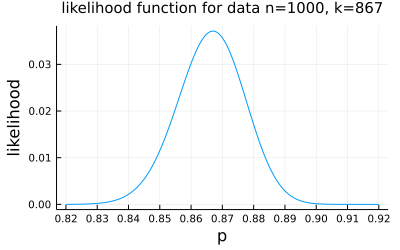

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250), titlefontsize=10, tickfontsize=7)

n, k = 1000, 867

P1 = plot(p -> pdf(Binomial(n, p), k), 0.82, 0.92; label="",
    xguide="p", yguide="likelihood",
    title="likelihood function for data n=$n, k=$k",
    xtick=0:0.01:1)

(n, k) = (1000, 867)
confint_clopper_pearson(n, k; α = 0.05) = [0.8443706729528716, 0.8874420356131526]


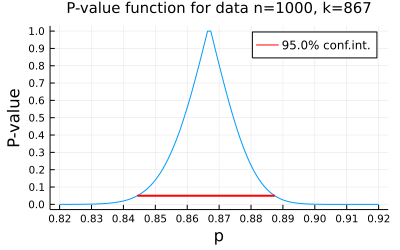

In [2]:
using Distributions
using StatsPlots
default(fmt=:png, size=(400, 250), titlefontsize=10, tickfontsize=7)

function pvalue_clopper_pearson(n, k, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

function confint_clopper_pearson(n, k; α=0.05)
    p_L = quantile(Beta(k, n-k+1), α/2)
    p_U = quantile(Beta(k+1, n-k), 1 - α/2)
    [p_L, p_U]
end

n, k = 1000, 867
α = 0.05
@show n, k
ci = @eval @show confint_clopper_pearson(n, k; α=$α)

P2 = plot(p -> pvalue_clopper_pearson(n, k, p), 0.82, 0.92; label="",
    xguide="p", yguide="P-value", title="P-value function for data n=$n, k=$k",
    xtick=0:0.01:1, ytick=0:0.1:1)
plot!(ci, fill(α, 2); label="$(100(1-α))% conf.int.", lw=2, c=:red)

In [3]:
pvalue_clopper_pearson.(n, k, ci)

2-element Vector{Float64}:
 0.049999999999999864
 0.04999999999999999

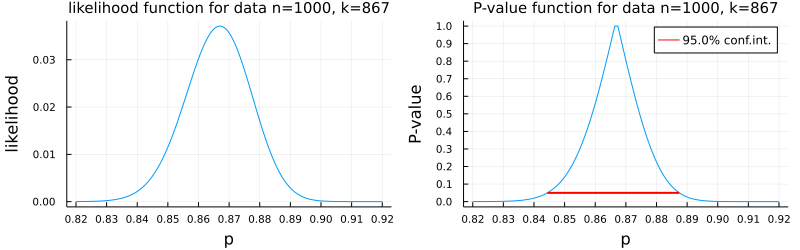

In [4]:
plot(P1, P2; size=(800, 250),
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)

(n, k) = (1000, 867)
posterior = posterior_conjugate(n, k; a = 1, b = 1) = Beta{Float64}(α=868.0, β=134.0)
credint(posterior; α = 0.05) = [0.8445241059512283, 0.8866263313639007]


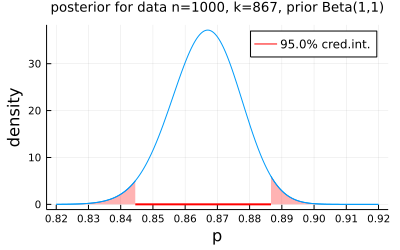

In [5]:
using Distributions
using Roots
using StatsPlots
default(fmt=:png, size=(400, 250), titlefontsize=10, tickfontsize=7)

posterior_conjugate(n, k; a=1, b=a) = Beta(a+k, n-k+b)

function credint(posterior; α=0.05)
    p_L, p_U = quantile.(posterior, (α/2, 1-α/2))
    [p_L, p_U]
end

n, k = 1000, 867
α = 0.05
a, b = 1, 1

@show n, k
@eval @show posterior = posterior_conjugate(n, k; a=$a, b=$b)
bci = @eval @show credint(posterior; α=$α)

P3 = plot(p -> pdf(posterior, p), 0.82, 0.92; label="",
    xguide="p", yguide="density",
    title="posterior for data n=$n, k=$k, prior Beta($a,$b)",
    xtick=0:0.01:1, titlefontsize=9)
plot!(bci, zeros(2); label="$(100(1-α))% cred.int.", lw=2, c=:red)
plot!(p -> pdf(posterior, p), 0.82, first(bci); label="",
    fillrange=0, c=1, fc=:red, fa=0.3)
plot!(p -> pdf(posterior, p), last(bci), 0.92; label="",
    fillrange=0, c=1, fc=:red, fa=0.3)

In [6]:
bci - ci

2-element Vector{Float64}:
  0.000153432998356684
 -0.0008157042492519251

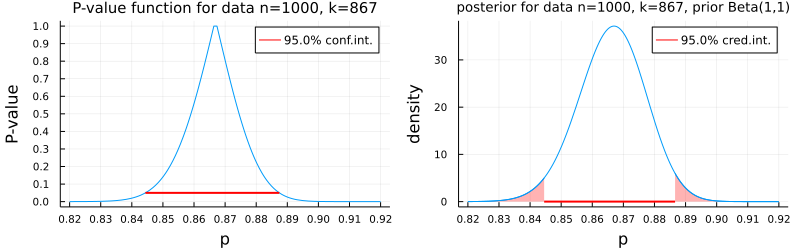

In [7]:
plot(P2, P3; size=(800, 250),
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)

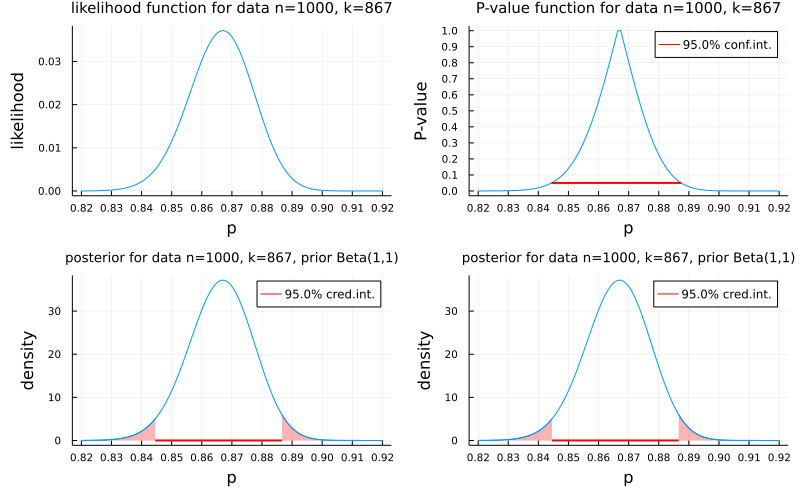

In [8]:
plot(P1, P2, P3, P3; size=(800, 500), layout=(2, 2),
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)